\Make Jupyter cells as wide as possible

In [44]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Import Python modules

In [45]:
import sys
import pandas as pd
import os
import platform
import matplotlib.pyplot as plt
print(platform.python_version())

3.6.4


# Define directory 
Set the directory to read motion files from.<br>
This directory should contain a set of sub-directories where the name matches the motion label.<br>
Each sub-directory contains a set of comma-separated (.csv) files each containing a single captured motion.

In [46]:
modelName = 'uniqueMotions' #to be used for exporting graphs and the trained ML model
rootDir = 'C:/Users/user/Dropbox/ShareIrene/ScienceFair/Experiments/DataFiles'
closeMotions = 'PortDeBras'
distinctMotions = 'UniqueMotions'

dataName = distinctMotions 
dataRootDir = os.path.join(rootDir, dataName)

# Process csv file functions

The main function 'read_csv_files' loops through the sub-directories of the root and reads the .csv files.<br>
It calls the functions 'add_csv_df' and 'prepare_csv_df' to convert the motion data into a single DataFrame that can be processed by the SKLearn toolkit.

### read_csv_files function
This procedure starts from a root directory and loops over each sub-directory.<br>
Each sub-directory represents one class of motions. The directory name is the label for this motion.<br>
Each sub-directory contains a set of .csv files. Each .csv file is one captured motion.<br>
It returns a DataFrame where each motion is one row.

In [47]:
# motions_dict = {}
def read_csv_files(rootDir):
    df_list = []
    for dirName, subdirList, fileList in os.walk(rootDir):
        if dirName == rootDir:
            motionName = ''
        else:
            head, motionName = os.path.split(dirName) #split removes the directory separator, so we don't need to do this by replacing '\' or '/'
        if len(motionName) > 0:
#             print('Motion: %s' % motionName)
            for fname in fileList:
                filename, file_extension = os.path.splitext(fname)
                #Only consider csv files
                if file_extension.lower() == '.csv':   
                    csv_file = os.path.join(dirName, fname)
                    fileSize = os.path.getsize(csv_file)
                    dataName = fname.replace('.CSV', '')
#                     print('\t%s, size = %i, data = %s' % (fname, fileSize, dataName))
                    if (fileSize > 0):
                        df = pd.read_csv(csv_file)
                        if len(df.index) >= 48:
                            df = df.head(48)
                            if not df.isnull().values.any():
                                add_csv_df(df_list, df, dataName, motionName)
                            else:
                                print('Found null values')
                        else :
                            print('Less than 49 samples: ' + fname)
    all_df = pd.concat(df_list)
    all_df.columns.names = ['sample','qt']
    if all_df.isnull().values.any():
        print ("NULL")
    return all_df

### add_csv_df function
Adds a DataFrame representing a single .csv file to the list 'df_list'.<br>

In [48]:
def add_csv_df(df_list, csv_df, dataName, motion):
    df = prepare_csv_df(csv_df, dataName, motion)
    if df.isnull().values.any():
        print("Null values")
    df_list.append(prepare_csv_df(csv_df, dataName, motion))
#     return none

### prepare_csv_df function
Takes the raw csv data, extracts the quaternions, stacks the sampled data in one column and then transposes it to a single row.

In [49]:
def prepare_csv_df(csv_df, dataName, motion):
    #1. Extract quaternion columns from csv_df
    df = csv_df[['quat_w','quat_x','quat_y','quat_z']]
    #2. Transpose (stack)
    df = pd.DataFrame(df.stack())
    #3. Name data column (multi-index)
    columns = [(motion,dataName)]
    df.columns = pd.MultiIndex.from_tuples(columns)
    #4. Transpose
    df = df.T
    df.index.names = ['motion', 'dataName']
    return df

# Read the motions from file

In [50]:
all_df = read_csv_files(dataRootDir)
all_df.head(10)

sample                      0                               1           \
qt                      quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion        dataName                                                   
Curl_90degree DATA0    -0.4968  0.4646  0.3141 -0.6623 -0.4977  0.4440   
              DATA1    -0.4685  0.4519  0.2859 -0.7032 -0.4783  0.4315   
              DATA10   -0.5858  0.4354  0.3359 -0.5955 -0.5982  0.4217   
              DATA11   -0.5681  0.4307  0.2999 -0.6339 -0.5832  0.4154   
              DATA12   -0.5953  0.4124  0.2927 -0.6244 -0.6054  0.3964   
              DATA13   -0.6444  0.3477  0.2029 -0.6501 -0.6537  0.3321   
              DATA14   -0.5931  0.4186  0.3132 -0.6122 -0.6033  0.4050   
              DATA15   -0.5585  0.4313  0.3514 -0.6153 -0.5681  0.4178   
              DATA16   -0.6050  0.4005  0.3098 -0.6146 -0.6147  0.3884   
              DATA17   -0.6006  0.3908  0.3140 -0.6228 -0.6130  0.3758   

sample                                      2            ...        45  \
qt                      quat_y  quat_z  quat_w  quat_x   ...    quat_y   
motion        dataName                                   ...             
Curl_90degree DATA0     0.2955 -0.6840 -0.5044  0.4164   ...    0.3179   
              DATA1     0.2693 -0.7159 -0.4878  0.4163   ...    0.2977   
              DATA10    0.3153 -0.6041 -0.6136  0.4026   ...    0.3187   
              DATA11    0.2780 -0.6403 -0.5972  0.4012   ...    0.2734   
              DATA12    0.2642 -0.6376 -0.6199  0.3776   ...    0.2914   
              DATA13    0.1815 -0.6553 -0.6655  0.3132   ...    0.3209   
              DATA14    0.2921 -0.6219 -0.6158  0.3909   ...    0.3021   
              DATA15    0.3314 -0.6268 -0.5787  0.4038   ...    0.3253   
              DATA16    0.2912 -0.6217 -0.6245  0.3768   ...    0.3159   
              DATA17    0.2986 -0.6276 -0.6199  0.3657   ...    0.3282   

sample                              46                              47  \
qt                      quat_z  quat_w  quat_x  quat_y  quat_z  quat_w   
motion        dataName                                                   
Curl_90degree DATA0    -0.6750 -0.4850  0.4585  0.3273 -0.6689 -0.4784   
              DATA1    -0.6968 -0.4617  0.4651  0.3069 -0.6901 -0.4576   
              DATA10   -0.6069 -0.5744  0.4479  0.3278 -0.6017 -0.5677   
              DATA11   -0.6371 -0.5731  0.4360  0.2910 -0.6299 -0.5678   
              DATA12   -0.6292 -0.5823  0.4216  0.3031 -0.6255 -0.5756   
              DATA13   -0.6041 -0.5837  0.4354  0.3304 -0.6004 -0.5772   
              DATA14   -0.6229 -0.5923  0.4095  0.3176 -0.6169 -0.5843   
              DATA15   -0.6151 -0.5701  0.4335  0.3340 -0.6128 -0.5637   
              DATA16   -0.6330 -0.5769  0.4105  0.3251 -0.6269 -0.5740   
              DATA17   -0.5886 -0.6096  0.4172  0.3389 -0.5828 -0.6038   

sample                                          
qt                      quat_x  quat_y  quat_z  
motion        dataName                          
Curl_90degree DATA0     0.4664  0.3358 -0.6639  
              DATA1     0.4728  0.3153 -0.6838  
              DATA10    0.4562  0.3369 -0.5968  
              DATA11    0.4427  0.3058 -0.6229  
              DATA12    0.4280  0.3121 -0.6230  
              DATA13    0.4420  0.3387 -0.5974  
              DATA14    0.4178  0.3289 -0.6130  
              DATA15    0.4400  0.3431 -0.6091  
              DATA16    0.4170  0.3334 -0.6209  
              DATA17    0.4259  0.3517 -0.5747  

[10 rows x 192 columns]

# Prepare machine learning data
Convert the motions into the X (input) matrix and Y (output) vector

In [51]:
X = all_df
X.head()

sample                      0                               1           \
qt                      quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion        dataName                                                   
Curl_90degree DATA0    -0.4968  0.4646  0.3141 -0.6623 -0.4977  0.4440   
              DATA1    -0.4685  0.4519  0.2859 -0.7032 -0.4783  0.4315   
              DATA10   -0.5858  0.4354  0.3359 -0.5955 -0.5982  0.4217   
              DATA11   -0.5681  0.4307  0.2999 -0.6339 -0.5832  0.4154   
              DATA12   -0.5953  0.4124  0.2927 -0.6244 -0.6054  0.3964   

sample                                      2            ...        45  \
qt                      quat_y  quat_z  quat_w  quat_x   ...    quat_y   
motion        dataName                                   ...             
Curl_90degree DATA0     0.2955 -0.6840 -0.5044  0.4164   ...    0.3179   
              DATA1     0.2693 -0.7159 -0.4878  0.4163   ...    0.2977   
              DATA10    0.3153 -0.6041 -0.6136  0.4026   ...    0.3187   
              DATA11    0.2780 -0.6403 -0.5972  0.4012   ...    0.2734   
              DATA12    0.2642 -0.6376 -0.6199  0.3776   ...    0.2914   

sample                              46                              47  \
qt                      quat_z  quat_w  quat_x  quat_y  quat_z  quat_w   
motion        dataName                                                   
Curl_90degree DATA0    -0.6750 -0.4850  0.4585  0.3273 -0.6689 -0.4784   
              DATA1    -0.6968 -0.4617  0.4651  0.3069 -0.6901 -0.4576   
              DATA10   -0.6069 -0.5744  0.4479  0.3278 -0.6017 -0.5677   
              DATA11   -0.6371 -0.5731  0.4360  0.2910 -0.6299 -0.5678   
              DATA12   -0.6292 -0.5823  0.4216  0.3031 -0.6255 -0.5756   

sample                                          
qt                      quat_x  quat_y  quat_z  
motion        dataName                          
Curl_90degree DATA0     0.4664  0.3358 -0.6639  
              DATA1     0.4728  0.3153 -0.6838  
              DATA10    0.4562  0.3369 -0.5968  
              DATA11    0.4427  0.3058 -0.6229  
              DATA12    0.4280  0.3121 -0.6230  

[5 rows x 192 columns]

In [52]:
Y = all_df.reset_index()['motion']
Y.head()

0    Curl_90degree
1    Curl_90degree
2    Curl_90degree
3    Curl_90degree
4    Curl_90degree
Name: motion, dtype: object

Check for any 'null' values. Nulls cause trouble in the learning algorithm and need to be avoided.

In [53]:
X.isnull().values.any()

False

In [54]:
Y.isnull().values.any()

False

# Learn
1. Label encoding
2. Split data set into a train and test set
3. Train GaussianNB model and test
4. Train RandomForrest model and test

## Label Encoding
We need to map the textual values of the predicted labels to a number.

In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(Y)
le.classes_

array(['Curl_90degree', 'Lotus', 'UndercutAndUp'], dtype=object)

## Split into a train and test set

In [56]:
# split the data to training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

## GaussianNB

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnbModel = gnb.fit(X_train, y_train)
y_pred = gnbModel.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 54 points : 0


In [58]:
from sklearn.metrics import classification_report
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = gnbModel.predict( X_test )
### test your predictions using sklearn.classification_report()
report = classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        24



## Detailed report on test data
For each item in the test set, get the detailed (probability-based) prediction and compare with actual data.

In [59]:
y_prediction_proba = gnbModel.predict_proba(X_test)
df = pd.DataFrame(y_prediction_proba, columns = le.classes_)
df['correct']=(y_prediction == y_test)
df['predicted']=le.inverse_transform(y_prediction)
df['actual']=le.inverse_transform(y_test)
df

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Curl_90degree,Lotus,UndercutAndUp,correct,predicted,actual
0,0.0,1.0,0.0,True,Lotus,Lotus
1,0.0,1.0,0.0,True,Lotus,Lotus
2,1.0,0.0,0.0,True,Curl_90degree,Curl_90degree
3,1.0,0.0,0.0,True,Curl_90degree,Curl_90degree
4,1.0,0.0,0.0,True,Curl_90degree,Curl_90degree
5,0.0,0.0,1.0,True,UndercutAndUp,UndercutAndUp
6,1.0,0.0,0.0,True,Curl_90degree,Curl_90degree
7,0.0,1.0,0.0,True,Lotus,Lotus
8,0.0,0.0,1.0,True,UndercutAndUp,UndercutAndUp
9,0.0,0.0,1.0,True,UndercutAndUp,UndercutAndUp


Plot probability data in histogram

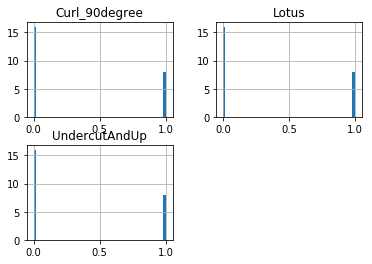

In [60]:
df2 = df.drop(['correct', 'predicted', 'actual'], axis=1)
df2.hist(bins=50)
plt.show()

## RandomForrest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdfModel = rdf.fit(X_train, y_train)
y_pred = rdfModel.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 54 points : 0


In [62]:
from sklearn.metrics import classification_report
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = rdfModel.predict( X_test )
### test your predictions using sklearn.classification_report()
report = classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        24



In [63]:
y_prediction_proba = rdfModel.predict_proba(X_test)
df = pd.DataFrame(y_prediction_proba, columns = le.classes_)
df['correct']=(y_prediction == y_test)
df['predicted']=le.inverse_transform(y_prediction)
df['actual']=le.inverse_transform(y_test)
df

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Curl_90degree,Lotus,UndercutAndUp,correct,predicted,actual
0,0.1,0.7,0.2,True,Lotus,Lotus
1,0.0,1.0,0.0,True,Lotus,Lotus
2,1.0,0.0,0.0,True,Curl_90degree,Curl_90degree
3,1.0,0.0,0.0,True,Curl_90degree,Curl_90degree
4,1.0,0.0,0.0,True,Curl_90degree,Curl_90degree
5,0.0,0.0,1.0,True,UndercutAndUp,UndercutAndUp
6,1.0,0.0,0.0,True,Curl_90degree,Curl_90degree
7,0.0,1.0,0.0,True,Lotus,Lotus
8,0.0,0.1,0.9,True,UndercutAndUp,UndercutAndUp
9,0.0,0.0,1.0,True,UndercutAndUp,UndercutAndUp


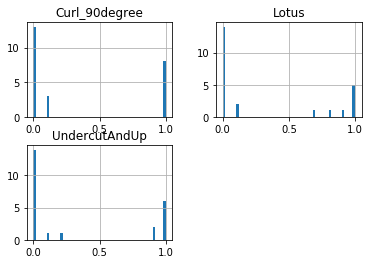

In [64]:
# df[df.columns[1]].hist(bins=50)
df2 = df.drop(['correct', 'predicted', 'actual'], axis=1)
df2.hist(bins=50)
plt.show()

## Save model

In [65]:
from sklearn.externals import joblib
joblib.dump(rdfModel, modelName + '.pkl') 

['uniqueMotions.pkl']

In [66]:
import pickle
pickle.dump(le, open(modelName + '.le', 'wb'))

# Plotting
Plot all motion data by quaternion.
Allows for a visual comparision of how close the motions are.

In [67]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

In [68]:
def getMultiMotions(X, qtName, motionName):
    '''qt is the name of the quaternion (e.g. 'quat_w'). motionName is the name of the motion (e.g. 'Curl_90degree'). 
    Should match the names of the indices of df X.
    Returns a df with multiple time-series of the quaternion of the motion type'''
    
    df = X.xs(qtName, level='qt', axis=1)\
        .xs(motionName, level='motion', axis=0)\
        .reset_index()\
        .drop(['dataName'], axis = 1)
    return df

In [69]:
def plotMotion2D(X, motionNames):
    numMotions = len(motionNames)
    fig, axes = plt.subplots(nrows=numMotions, ncols=4, figsize=(20, numMotions*4))
#     fig.suptitle(motionName, fontsize=20)
    for motionIdx in range(0,numMotions):
        motionName = motionNames[motionIdx]
        for qtIdx in range(0,4):
            axes[motionIdx][qtIdx].set_autoscaley_on(False)
            axes[motionIdx][qtIdx].set_ylim([-1,1])
        
        axes[motionIdx][0].set_ylabel(motionName)
        axes[motionIdx][0].set_title('w')
        axes[motionIdx][1].set_title('x')
        axes[motionIdx][2].set_title('y')
        axes[motionIdx][3].set_title('z')
        axes[motionIdx][0].plot(getMultiMotions(X, 'quat_w', motionName).T)
        axes[motionIdx][1].plot(getMultiMotions(X, 'quat_x', motionName).T)
        axes[motionIdx][2].plot(getMultiMotions(X, 'quat_y', motionName).T)
        axes[motionIdx][3].plot(getMultiMotions(X, 'quat_z', motionName).T)
    return fig

In [70]:
motionNames = X.index.levels[0].tolist()
motionNames

['Curl_90degree', 'Lotus', 'UndercutAndUp']

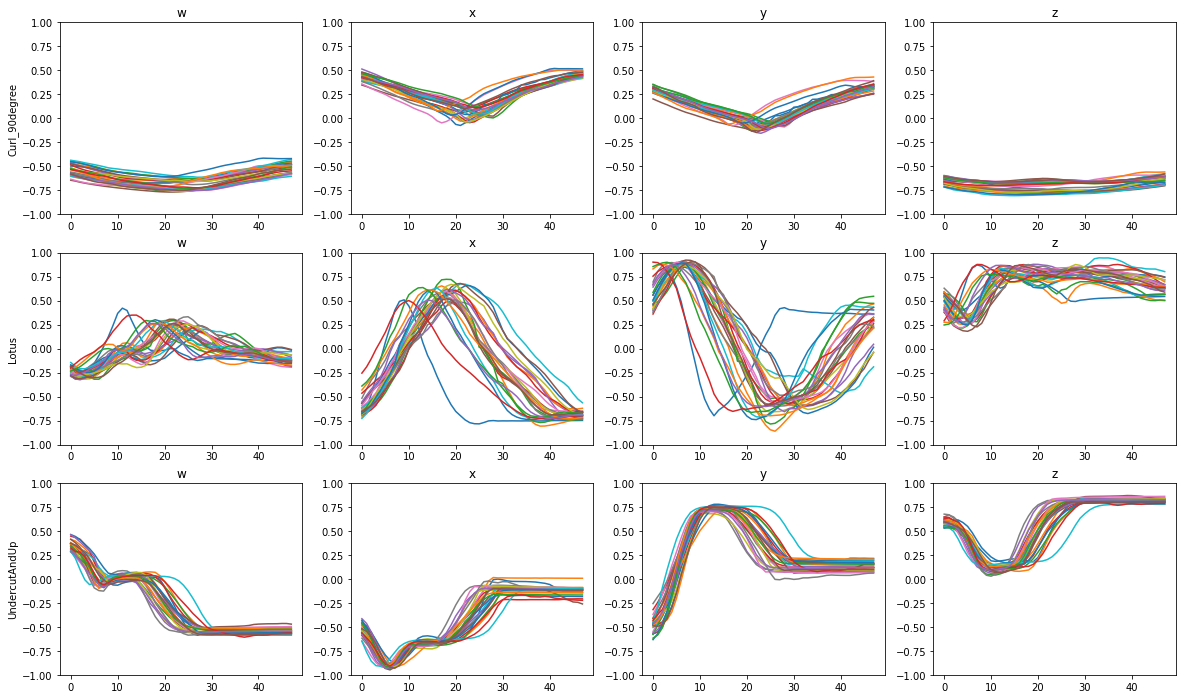

In [71]:
plotMotion2D(X, motionNames)
plt.savefig('Handoid-Motions-'+modelName+'.png')
plt.show()

# Evaluate
Evaluate whole dataset from previously saved model

In [82]:
modelName = 'uniqueMotions_v1' #previously saved model
evaluateMotions = '20180309_1434'
dataRootDir = os.path.join(rootDir, evaluateMotions) #Uses the same rootDir

Read model using 'joblib'

In [83]:
evalModel = joblib.load(modelName + '.pkl') 

Read back LabelEncoder using 'pickle'

In [84]:
evalLE = pickle.load(open(modelName + '.le', 'rb'))

Read the data

In [85]:
X_eval = read_csv_files(dataRootDir)
Y_eval = X_eval.reset_index()['motion']
X_eval.head(10)

sample                       0                               1           \
qt                       quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion         dataName                                                   
Curl_90degrees DATA0     0.6102 -0.2101 -0.7629  0.0392  0.6129 -0.2120   
               DATA1     0.7042 -0.2271 -0.6609  0.1257  0.7012 -0.2321   
UndercutAndUp  DATA0     0.3398 -0.5552 -0.1304  0.7479  0.3621 -0.5477   
               DATA2     0.1911 -0.6005 -0.4158  0.6558  0.1944 -0.6074   

sample                                       2            ...        45  \
qt                       quat_y  quat_z  quat_w  quat_x   ...    quat_y   
motion         dataName                                   ...             
Curl_90degrees DATA0    -0.7602  0.0385  0.6128 -0.2145   ...   -0.5830   
               DATA1    -0.6609  0.1329  0.6915 -0.2360   ...   -0.6094   
UndercutAndUp  DATA0    -0.1361  0.7419  0.3638 -0.5469   ...    0.6592   
               DATA2    -0.3934  0.6622  0.1977 -0.6039   ...    0.5576   

sample                               46                              47  \
qt                       quat_z  quat_w  quat_x  quat_y  quat_z  quat_w   
motion         dataName                                                   
Curl_90degrees DATA0     0.1533  0.7708 -0.2155 -0.5798  0.1525  0.7665   
               DATA1     0.1061  0.7456 -0.2457 -0.6105  0.1051  0.7415   
UndercutAndUp  DATA0     0.3888 -0.5953 -0.2410  0.6626  0.3854 -0.5942   
               DATA2     0.3599 -0.7398 -0.1136  0.5567  0.3604 -0.7396   

sample                                           
qt                       quat_x  quat_y  quat_z  
motion         dataName                          
Curl_90degrees DATA0    -0.2159 -0.5844  0.1558  
               DATA1    -0.2515 -0.6120  0.1114  
UndercutAndUp  DATA0    -0.2401  0.6633  0.3863  
               DATA2    -0.1136  0.5580  0.3588  

[4 rows x 192 columns]

Evaluate the data based on a saved model.

In [86]:
evalLE.classes_

array(['Curl_90degree', 'Lotus', 'UndercutAndUp'], dtype=object)

In [87]:
y_prediction = evalModel.predict(X_eval)
y_prediction_proba = evalModel.predict_proba(X_eval)
df = pd.DataFrame(y_prediction_proba, columns = evalLE.classes_)
df['predicted']=evalLE.inverse_transform(y_prediction)
df['actual']=Y_eval
df['correct']=(df['predicted']==df['actual'])
df.head(10)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Curl_90degree,Lotus,UndercutAndUp,predicted,actual,correct
0,0.2,0.6,0.2,Lotus,Curl_90degrees,False
1,0.2,0.6,0.2,Lotus,Curl_90degrees,False
2,0.1,0.1,0.8,UndercutAndUp,UndercutAndUp,True
3,0.1,0.0,0.9,UndercutAndUp,UndercutAndUp,True
